In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environments.BiddingEnvironment import *
from learners.GTS_Learner import *
from learners.GPTS_Learner import *

In [2]:
from data_generators.basic_generator import *

d = BasicDataGenerator('src/basic002.json')
d.get_daily_clicks(mode='aggregate')
d.get_bids()
np.linspace(0.0, 2.0, 10)

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [3]:
n_arms = 10
min_bid = 0.0
max_bid = 2.0
bids = np.array(d.get_bids())
sigma = 10

In [4]:
T = 60
n_experiments = 300
gts_rewards_per_experiment = []
gpts_rewards_per_experiment = []

In [5]:
for e in range(0, n_experiments):
    env = BiddingEnvironment(bids = bids, sigma = sigma)
    gts_learner = GTS_Learner(n_arms = n_arms)
    gpts_learner = GPTS_Learner(n_arms = n_arms, arms = bids)
    for t in range(0, T):
        pulled_arm = gts_learner.pull_arm()
        reward = env.round(pulled_arm)
        gts_learner.update(pulled_arm, reward)
        
        pulled_arm = gpts_learner.pull_arm()
        reward = env.round(pulled_arm)
        gpts_learner.update(pulled_arm, reward)
        
    gts_rewards_per_experiment.append(gts_learner.collected_rewards)
    gpts_rewards_per_experiment.append(gpts_learner.collected_rewards)

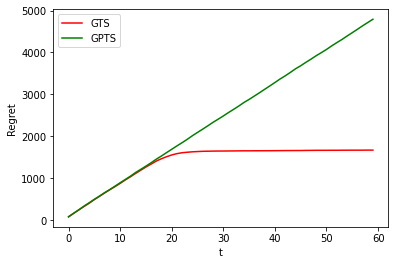

In [6]:
opt = np.max(env.means)
plt.figure(0)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(opt - gts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gpts_rewards_per_experiment, axis=0)), 'g')
plt.legend(['GTS', 'GPTS'])
plt.show()